In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the data set.

df = pd.read_csv('data/FuelConsumption.csv')

df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# selecting some features for the regression.
features = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']

new_df = df[features]

new_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


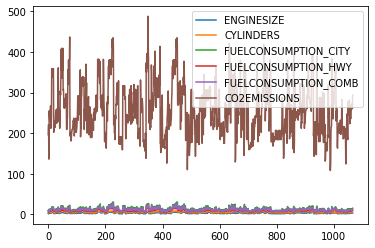

In [6]:
new_df.plot()
plt.show()

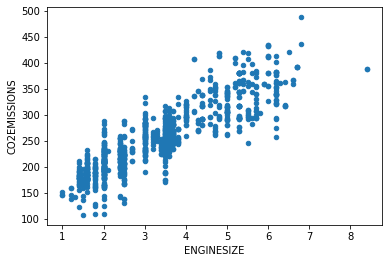

In [9]:
df.plot(kind='scatter', x='ENGINESIZE', y='CO2EMISSIONS')
plt.show()

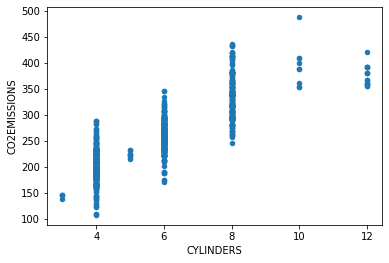

In [11]:
df.plot(kind='scatter', x='CYLINDERS', y='CO2EMISSIONS')
plt.show()

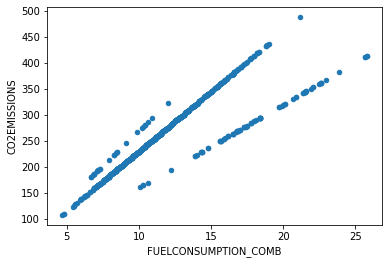

In [12]:
df.plot(kind='scatter', x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS')
plt.show()

In [10]:
# creating a mask to select random rows from the data set using np.random.rand()

mask = np.random.rand(len(new_df)) < 0.8

train = new_df[mask]

test = new_df[~mask]

In [13]:
# creating the linear regression model.

from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB', 'CYLINDERS', 'ENGINESIZE']])

train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In [14]:
# model parameters.

print("intercept : ", regr.intercept_)

print("coefficients : ", regr.coef_)

intercept :  [65.61058513]
coefficients :  [[ 9.33352284  7.76216371 11.07718046]]


In [15]:
# model evalutation.

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB', 'CYLINDERS', 'ENGINESIZE']])

test_y = np.asanyarray(test[['CO2EMISSIONS']])

predict_y = regr.predict(test_x)

print("Acutal values :\n", test_y.flatten())

print("Model predictions: \n", predict_y.flatten())


Acutal values :
 [196 255 255 212 239 359 230 251 224 260 227 258 304 336 290 237 200 193
 228 237 209 230 228 213 281 212 317 338 200 260 258 262 248 253 340 271
 269 276 163 414 235 270 290 182 317 317 283 232 246 230 225 308 276 294
 320 317 258 294 308 202 195 202 278 179 488 382 281 274 315 343 320 165
 170 186 216 126 237 362 432 411 435 413 324 329 290 294 159 276 196 232
 242 177 253 271 253 306 306 285 306 315 310 225 255 278 225 235 251 223
 216 200 175 271 207 262 246 225 354 283 347 129 239 297 297 271 294 281
 207 262 368 346 292 347 334 198 196 177 161 168 221 347 407 363 260 278
 276 269 207 179 175 168 191 191 184 191 184 191 196 191 288 283 267 198
 283 251 398 177 246 253 253 244 248 274 225 320 239 340 324 275 254 393
 359 184 221 218 196 179 198 225 221 189 126 285 310 235 168 225 197 221
 186 212 198 198 184 281 281 232 271]
Model predictions: 
 [198.14854505 254.55580256 256.77123865 209.11288323 248.02233657
 369.71487074 212.14882931 247.15050776 222.88334838 27

In [16]:
# metrics score.

print("Residual sum of squares (MSE) : ", np.mean((predict_y - test_y) ** 2))

print("Explained Variance Score : ", regr.score(test_x, test_y))

Residual sum of squares (MSE) :  501.00001768969787
Explained Variance Score :  0.8765893454265381
